Import libraries

In [18]:
import pandas as pd
from sklearn import linear_model

import numpy as np
%matplotlib inline
#import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats

from patsy import dmatrices
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve


Import Data

In [20]:
df = pd.read_csv('/Users/kariroesch/Dropbox/InsightHealthDataScience/dataChallenges/week5_cleaned.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
Unnamed: 0                     683 non-null int64
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
Bare Nuclei                    683 non-null int64
dtypes: int64(12)
memory usage: 64.1 KB


Split Data into Training and Test Sets

In [21]:
features = df[["Clump Thickness", "Uniformity of Cell Size", 
                "Uniformity of Cell Shape","Marginal Adhesion", 
                "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
                "Normal Nucleoli","Mitoses"]].as_matrix()
target = df[["Sample code number", "Class"]].as_matrix()
f_train, f_test, t_train_wID, t_test_wID = train_test_split(features, target, test_size=0.20, random_state=0)
t_train = t_train_wID[:,[1]]
t_test = t_test_wID[:,[1]]

I chose a Support Vector Machine (SVM) model because it is appropriate for non-normally
distributed data. 

Here I create the SVM model, fit the data to it and check scores

In [37]:
from sklearn import svm

X = f_train
y = t_train

# Create SVM classification object 
svm_model = svm.SVC(kernel='linear', C=0.5, gamma=1, random_state=5) 
#Train the model using the training sets
svm_model.fit(X, y)
#Predict Output
predictedSVM = svm_model.predict(f_test)

#Check Training and Test Scores
print svm_model.score(X, y), svm_model.score(f_test, t_test)

0.972527472527 0.956204379562


/Applications/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


Flatten the classification labels for input into the crossvalidation scoring

In [23]:
y_arr = t_train.ravel()

Evaluate the model using 10-fold cross-validation

In [24]:
svm_cv_scores = cross_val_score(svm.SVC(kernel='linear', C=0.1, gamma=1, random_state=5), 
                            f_train, y_arr, scoring='accuracy', cv=10)
print svm_cv_scores
print svm_cv_scores.mean()

[ 0.94545455  0.96363636  0.96363636  1.          0.94545455  1.
  0.98181818  0.96296296  1.          0.94339623]
0.970635918938


Predict class labels for the test set

In [25]:
predictedSVM = svm_model.predict(f_test)
print predictedSVM

[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0]


Calculate Precision, Recall and F1 scores

In [26]:
precision_recall_fscore_support(t_test, predictedSVM, average='micro')

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


(0.92156862745098034, 0.93999999999999995, 0.93069306930693074, None)

Calculate accuracy on the test data

In [28]:
accuracySVM = accuracy_score(t_test, predictedSVM)
accuracySVM

0.94890510948905105

Calculate the ROC curve

In [30]:
roc_curve(t_test, predictedSVM)
fprSVM, tprSVM, _ = roc_curve(t_test, predictedSVM)
roc_auc_testSVM = auc(fprSVM, tprSVM)
roc_auc_testSVM

0.94701149425287368

Plot the ROC curve

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


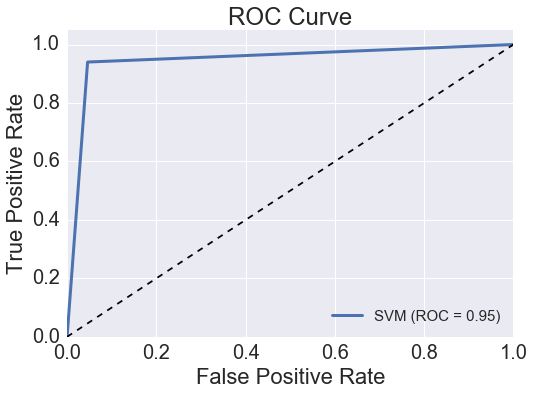

In [31]:
import seaborn as sns

# Plot of a ROC curve for a specific class
plt.figure()
sns.set(font_scale=2)
# plt.plot(fprLR, tprLR, linewidth=3.0, label='logistic regression (ROC = %0.2f)' % roc_auc_testLR)
# plt.plot(fprRF, tprRF, linewidth=3.0, label='random forest (ROC = %0.2f)' % roc_auc_testRF)
plt.plot(fprSVM, tprSVM, linewidth=3.0, label='SVM (ROC = %0.2f)' % roc_auc_testSVM)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", prop={'size':15})

plt.show()

This is looking pretty good! I should check out how a different modeling approach
might look. Another one that is appropriate for non-normally distributed data is 
K-Means Clustering. 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNNmodel = KNeighborsClassifier(5).fit(f_train, t_train)
#KNeighborsClassifier(#of neighbors to look at)
#fit(x,y) trains the algorithm, equivalent to plotting the points in the chart, 
#but in 4D (or however many features there are?)
print KNNmodel

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [48]:
# Predict probabilities
#KNNmodel.predict_proba(f_test)

In [44]:
KNNmodel.predict(f_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [45]:
#measure accuracy of predictions
KNNmodel.score(f_test, t_test)

0.97080291970802923

In [47]:
cv_scoresKNN = cross_val_score(KNeighborsClassifier(5), f_train, y_arr, scoring='accuracy', cv=10)
print cv_scoresKNN
print cv_scoresKNN.mean()

[ 0.94545455  0.94545455  0.98181818  1.          0.96363636  1.
  0.98181818  0.96296296  0.98148148  0.98113208]
0.97437583381


In [49]:
predictedKNN = KNNmodel.predict(f_test)
print predictedKNN

[0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0]


In [50]:
precision_recall_fscore_support(t_test, predictedKNN, average='micro')

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


(0.94230769230769229, 0.97999999999999998, 0.96078431372549022, None)

In [51]:
accuracyKNN = accuracy_score(t_test, predictedKNN)
accuracyKNN

0.97080291970802923

In [52]:
roc_curve(t_test, predictedKNN)
fprKNN, tprKNN, _ = roc_curve(t_test, predictedKNN)
roc_auc_testKNN = auc(fprKNN, tprKNN)
roc_auc_testKNN

0.97275862068965524

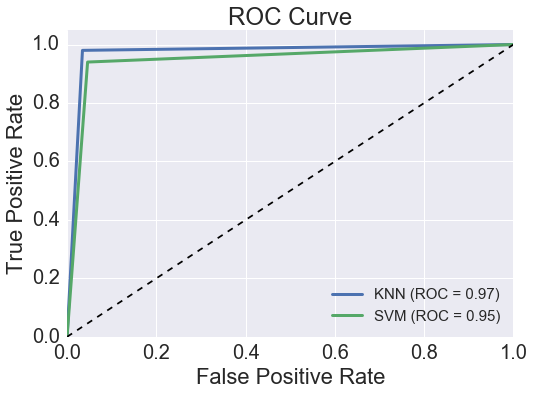

In [53]:
# Plot of a ROC curve for a specific class
plt.figure()
sns.set(font_scale=2)
plt.plot(fprKNN, tprKNN, linewidth=3.0, label='KNN (ROC = %0.2f)' % roc_auc_testKNN)
plt.plot(fprSVM, tprSVM, linewidth=3.0, label='SVM (ROC = %0.2f)' % roc_auc_testSVM)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", prop={'size':15})

plt.show()

It turns out both classifiers are up to the task and score very well 